# Симуляция данных для проблемы 1

### Проблема 1: Поиск неизвестного сигнала.
По ссылке ниже вы можете найти результаты двух экспериментов из области физики частиц.
(Конечно это симуляция, но давайте думать что это настоящие данные)
Данные представляют собой смесь выборок полученных их двух источников:
- Первый источник, назовем его фоном, дает равномерное распределение величины M в диапазоне от 0 до 10
- Второй источник, назовем его сигналом, нам не известен, но мы хотим проверить теорию по которой сигнальные события нормально распределены вокруг некоторого значения с некоторой шириной.
- Мы знаем, что наша экспериментальная установка не слишком точная, и измеренное значение M немного отличается от сгенерированного (с помощью сигнальной или фоновой модели). Измеренное значение распределено нормально вокруг истинного значения с шириной 0.1.

Задача: используя данные обоих экспериментов, сделать вывод о том присутствует ли в них сигнал, и, если да, каковы его параметры
(сигнал может присутствовать а может и нет, параметры сигналов могут различаться)
Ссылка на данные: https://u.pcloud.link/publink/show?code=VZR9StXZsCxkqS8Bq1VbczrxyrLay4sI81oX

В этом ноутбуке мы подробно рассмотрим симуляцию сигналов для задачи 1.

### Симуляция данных первого источника

По условию задачи первый источник - фон - создает равномерное распределение величины M в диапазоне от 0 до 10. Из лекции 3 мы знаем про библиотеку `scipy.stats` и можем ей восползоваться для получения генератора равномерно распределенной случайной величины.

In [2]:
from scipy.stats import uniform
source_1 = uniform(0, 10)

Теперь сгенерируем 1000 событий из источника 1:

In [4]:
ev_source_1 = source_1.rvs(1000)

Посмотрим на эти данные

(array([44., 55., 52., 50., 57., 43., 44., 55., 67., 48., 40., 50., 43.,
        43., 43., 52., 57., 56., 47., 54.]),
 array([5.23395087e-03, 5.03925212e-01, 1.00261647e+00, 1.50130774e+00,
        1.99999900e+00, 2.49869026e+00, 2.99738152e+00, 3.49607278e+00,
        3.99476404e+00, 4.49345530e+00, 4.99214657e+00, 5.49083783e+00,
        5.98952909e+00, 6.48822035e+00, 6.98691161e+00, 7.48560287e+00,
        7.98429414e+00, 8.48298540e+00, 8.98167666e+00, 9.48036792e+00,
        9.97905918e+00]),
 <BarContainer object of 20 artists>)

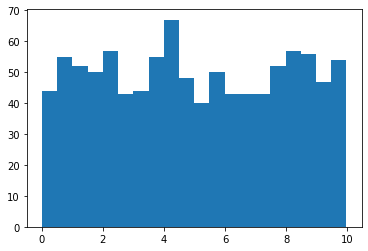

In [5]:
import matplotlib.pyplot as plt
plt.hist(ev_source_1, bins = 20)

### Симуляция данных второго источника

По условию задачи мы ничего не знаем про второй источник, но мы предполагаем что сигнал из него распределен нормально. В случае когда мы хотим смоделировать ситуацию при которой вообще нет второго источника, мы можем опустить этот шаг. 

Но давайте будем считать что экспериментаторам повезло и второй источник присутствует. Более того, второй источник действительно сгенерирован из нормального распределения.
Пусть среднее значение будет равно 6, а дисперсия 1.

In [10]:
from scipy.stats import norm
source_2 = norm(6, 1)

Теперь давайте получим 100 событий из источника 2:

In [14]:
ev_source_2 = source_2.rvs(100)

Ну и посмотрим как распределены сигналы из второго источника

(array([ 2.,  0.,  7.,  3.,  4., 10., 12.,  8., 17.,  7.,  7.,  6.,  3.,
         3.,  3.,  3.,  3.,  0.,  1.,  1.]),
 array([3.88169776, 4.1261928 , 4.37068784, 4.61518287, 4.85967791,
        5.10417295, 5.34866799, 5.59316302, 5.83765806, 6.0821531 ,
        6.32664814, 6.57114317, 6.81563821, 7.06013325, 7.30462829,
        7.54912332, 7.79361836, 8.0381134 , 8.28260844, 8.52710347,
        8.77159851]),
 <BarContainer object of 20 artists>)

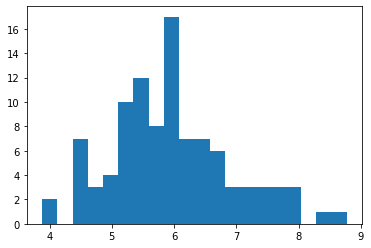

In [15]:
plt.hist(ev_source_2, bins = 20)

### Комбинирование данных

По условиям эксперимента, мы не можем сказать какому источнику принадлежит то или иное событиею. Поэтому в эксперименте мы видим сумму событий из двух источников:

In [19]:
import numpy as np
combined_ev = np.concatenate([ev_source_1, ev_source_2])

Вот так выглядит комбинированное распределение:

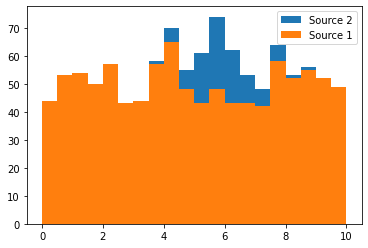

In [23]:
plt.hist(combined_ev, range = [0, 10], bins = 20, label = "Source 2")
plt.hist(ev_source_1, range = [0, 10], bins = 20, label = "Source 1")
plt.legend()

### Симуляция детектора
Наконец, наш детектор производит шум. По условию задачи, измеренное значение случайной величины смещено относительного истинного значения на нормально распределенну случайную величину.

Для симуляции этого, первым делом создадим набор значений шума для каждого события. По условию задачи шум распределен нормально, он несммещен (среденее равно 0), и его дисперсия равна 0.1.

In [24]:
noise_rv = norm(0, 0.1)

Создадим вектор значений шума совпадающий по длине с векотором измерений

In [25]:
noise_vals = noise_rv.rvs(len(combined_ev))

Теперь добавим шум к каждому измеренному значению

In [26]:
detected = noise_vals +combined_ev

Посмотрим насколько щум влияет на результат. Обратите внимание на "вытекание" значений за пределы изначального диапазона от [0, 10]

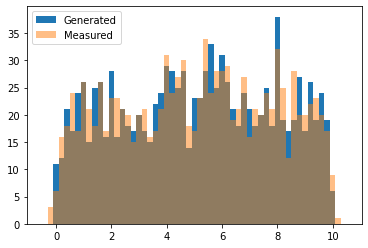

In [31]:
plt.hist(combined_ev, bins = 55, range = [-0.5, 10.5], label = "Generated" )
plt.hist(detected, bins = 55, range = [-0.5, 10.5], label = "Measured", alpha = 0.5 )
plt.legend()

Теперь ваша задача получить оценку числа собыьтий и формы распределения сигнала 2 имея только комбинированные и зашумленные данные.